# Thompson Sampling

## Dataset

### Layout

* Columns:
	* Ads (10 columns total)
* Rows: 100s of observations
	* Each row represents a round where a customer clicked on a particular ad
	    * 1 = customer clicked on ad
        * 0 = customer did not click on ad

### Background

* One is a data scientist working for one's favorite automobile company
* General manager of the company wants one to optimize the online advertising of the company's new SUV to determine the best ad among many ads in order to optimize the click-through rate (CTR) of customers clicking on the ad
* Company's advertising team prepared ads with 10 different designs
    * Each design correlates to a column in the dataset representing an ad
* Company will show ads, one at a time, to customers when they connect to a Web page on the company's Website
* Company will record whether a customer clicked on an ad
* Thompson Sampling algorithm will start with the first customer by showing a random ad and record if a customer clicked on the ad (yes = 1, no = 0)
* Thompson Sampling algorithm will show ads to subsequent customers and record if one clicked on the ad
* This will be performed for ~10,000 users
* Each ad in the dataset has a fixed conversion rate
    * This is a required assumption of the Thompson Sampling algorithm
    * Over time, each ad will convert the same rate of users

#### Important to Understand

* In reality, users connect to a Web page one by one, and are successively shown ads
* This happens in real-time and is a dynamic process
* The data in the dataset was not collected as a static process over a controlled period of time
* The only way to simulate this process in real-time is:
    1. Real World
        * Make 10 real ads right now
        * Open Google Ad Words account
        * Show ads to real users connecting to the Website in real-time
        * Not an option as it is costly
    2. Simulation
        * Simulation is given by the dataset
        * Each row represents a user shown an ad
        * Each column represents 1 of the 10 ads shown
        * The dataset is a simulation in the sense that each time a user connects to a Web page, it tells one, even if not known in reality, which ad the user of the row clicked on
        * The dataset shows the different ads a user clicked on and ones a user did not
        * Since one would not know which ads a user clicked on in reality, the simulation is the only way to run the Thompson Sampling algorithm, if one is not running it in a real world advertising campaign

### Goals

* Build Thompson Sampling model to determine the best ad that will optimize the number of customers clicking on it
* Find the ad with the highest CTR

![Thompson Sampling Algorithm](Thompson_Sampling_Algorithm.png)

## Import Libraries

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import Dataset

In [23]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling Algorithm

### Step 1

#### Initialize Variables

* `N` is the number of rounds
* `d` is the number of ads
* `ads_selected` is the full list of ads selected over all rounds
* `numbers_of_rewards_1` (represents $N^1_i(n)$) is the number of times ad $i$ got reward 1 up to round $n$
* `numbers_of_rewards_0` (represents $N^0_i(n)$) is the number of times ad $i$ got reward 0 up to round $n$
* `total_reward` is the total sum of all sums of rewards over all rounds

**Note:** Variables for $N^1_i(n)$ and $N^0_i(n)$ complete step 1 of the Thompson Sampling algorithm.

In [34]:
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0

### Step 2

#### Import Additional Libraries

* `random` is used for randomly selecting a value from each ad's `i` distribution for each round `n`

In [25]:
import random

#### For Loops and Formulas

* `n` iterator variable represents round number
* `ad` is the index of the currently selected ad for round `n`
    * Is initialized to `0` to begin the Thompson Sampling algorithm for round `n`
* `max_random` is the maximum random value selected from all the ads' distributions for round `n`
    * Random distribution value will be selected for each ad
    * Random value of each ad will be compared to the max random value
    * Is initialized to `0` to begin the Thompson Sampling algorithm for round `n`
    * Is updated when a random value is larger than the previous max random value
* `i` iterator variable represents ad number
* `random_beta` (represents $\theta_i(n)$) is the random draw (value) taken from the beta (Bernoulli) distribution parameters $\beta(N_i^1(n) + 1,\ N_i^0(n) + 1)$ for round `n`

**Note:** Variable for $\theta_i(n)$ complete step 2 of the Thompson Sampling algorithm.

### Step 3

#### Select Ads

* If condition checks if the `random_beta` is greater than the `max_random`
    * If yes, `max_random` is assigned the value of `random_beta`, becoming the new max random value
* Assign `ad` selected to index `i`
* `ad` is the ad selected when it has the highest random value
    * Means when `random_beta > max_random`
* Append `ad` selected to `ads_selected` list
* Set `reward` using the reward value from the dataset at row `n` and column `ad` for ad selected
* If condition checks if the `reward` equals $1$
    * If yes, increment `numbers_of_rewards_1` by 1
* If condition checks if the `reward` equals $0$
    * If yes, increment `numbers_of_rewards_0` by 1
* Update `total_reward` by incrementing it by the `reward` value

In [35]:
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] += 1
    else:
        numbers_of_rewards_0[ad] += 1
    total_reward += reward

## Visualize Results

* Plot histogram
    * x-axis: Different ads (0-9 by index)
    * y-axis: Number of times an ad was selected

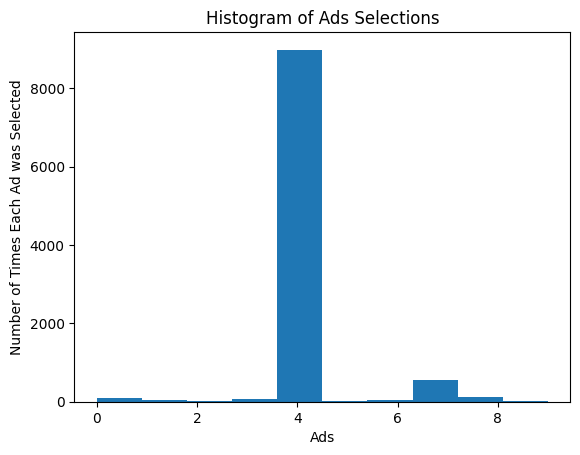

In [36]:
plt.hist(ads_selected)
plt.title('Histogram of Ads Selections')
plt.xlabel('Ads')
plt.ylabel('Number of Times Each Ad was Selected')
plt.show()

## Analyzing Results

* Ad #5 (index 4) was selected the most
* Means it had the highest CTR of all the ads
* This ad had the best image of the SUV attracting the most customers

*One needs to determine how many rounds it took the Thompson Sampling algorithm to identify the ad with the highest CTR*

* In order to determine this, one needs to change the number of rounds `N` to a lesser value to identify the highest CTR faster
    * For example, $N = 1000$
    * At this value, it was still able to identify the ad with the highest CTR
    * At $N = 500$, it was able to identify the ad with the highest CTR
    * This means 500 rounds is enough to identify the ad with the highest CTR

*Was the Thompson Sampling algorithm able to identify the ad with the highest CTR quicker than the UCB algorithm?*

* Remember, UCB failed to identify the ad with the highest CTR in 500 rounds
* Thompson Sampling was able to identify the ad with the highest CTR in 500 rounds, performing better than UCB
* In general, Thompson Sampling will outperform UCB in terms of accuracy and computation speed